In [1]:
import user_steps as us

On packet:10000
On packet:20000
On packet:30000
On packet:40000
On packet:50000
On packet:60000
On packet:70000
On packet:80000
On packet:90000
On packet:100000

 class balance normal to abnormal in the original data
(0.8109343231799444, 0.1890656768200556)

 class balance normal to abnormal in the produced data
(0.038461538461538464, 0.9615384615384616)


Tuning RandomForest


Tuning DecisionTree


Tuning SVC


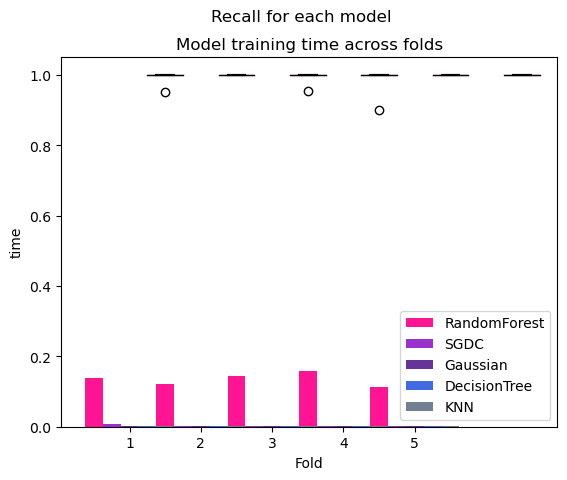

In [2]:
tn, tr, on, opr = us.fullToLive('data/initial_tests/CaptureW64.pcapng', 'data/initial_tests/CaptureW64TARGETS.txt')

In [71]:
fits = []
eval_time = []
bal_acc = []
f1 = []
prec = []
recall = []

for i in range(len(tr)):
	fits.append(tr[i]['fit_time'])
	eval_time.append(tr[i]['score_time'])
	bal_acc.append(tr[i]['test_balanced_accuracy'])
	f1.append(tr[i]['test_f1'])
	prec.append(tr[i]['test_precision'])
	recall.append(tr[i]['test_recall'])


In [61]:
tr

[{'fit_time': array([0.13919091, 0.12140679, 0.14516616, 0.15691376, 0.11311102]),
  'score_time': array([0.01654696, 0.0147841 , 0.01205993, 0.01589203, 0.01240587]),
  'test_balanced_accuracy': array([1.   , 1.   , 0.975, 1.   , 0.5  ]),
  'test_f1': array([1.        , 1.        , 0.97435897, 1.        , 0.91891892]),
  'test_precision': array([1.  , 1.  , 1.  , 1.  , 0.85]),
  'test_recall': array([1.  , 1.  , 0.95, 1.  , 1.  ])},
 {'fit_time': array([0.00789785, 0.00215387, 0.00346994, 0.00284314, 0.00242734]),
  'score_time': array([0.00492096, 0.0055449 , 0.00417709, 0.00399375, 0.00370097]),
  'test_balanced_accuracy': array([1. , 1. , 0.5, 1. , 0.5]),
  'test_f1': array([1.        , 1.        , 0.97560976, 1.        , 0.91891892]),
  'test_precision': array([1.        , 1.        , 0.95238095, 1.        , 0.85      ]),
  'test_recall': array([1., 1., 1., 1., 1.])},
 {'fit_time': array([0.00237799, 0.00182676, 0.00192785, 0.00176883, 0.00228524]),
  'score_time': array([0.003819

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Training time for each model across splits')

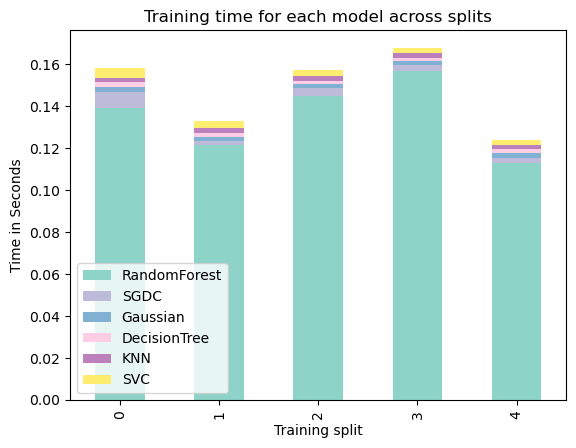

In [54]:
ordered = []

for i in range(len(fits[0])):
	row = []
	for j in range(len(fits)):
		row.append(fits[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])
df =  pd.DataFrame(ordered, columns=columns)

df.plot(kind='bar', stacked=True, colormap='Set3')# subplots=True, legend=True, figsize=(5,5))
plt.xlabel("Training split")
plt.ylabel("Time in Seconds")
plt.title("Training time for each model across splits")


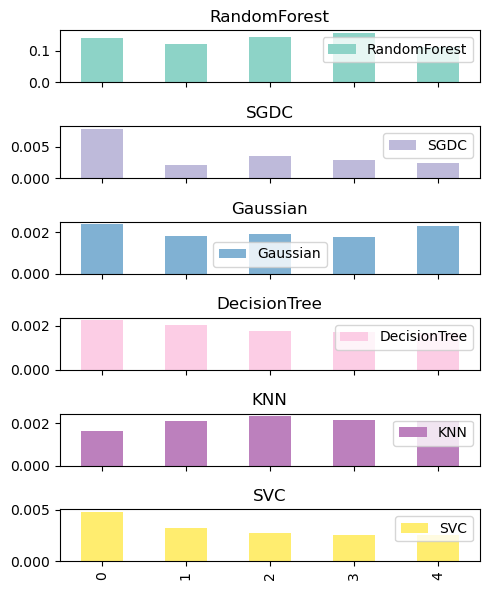

In [60]:
df.plot(kind='bar', colormap='Set3', subplots=True, figsize=(5,6))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Evaluation time for test data in each split')

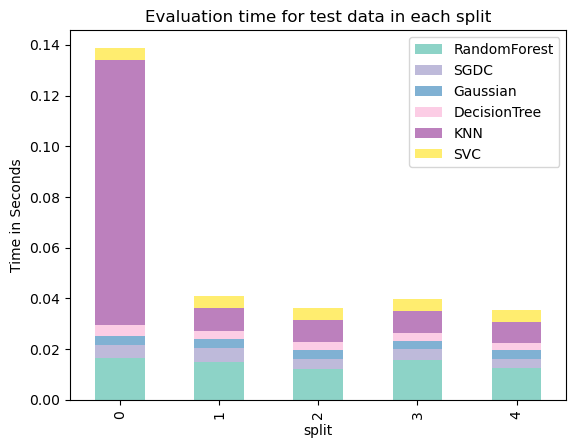

In [112]:
ordered = []

for i in range(len(eval_time[0])):
	row = []
	for j in range(len(eval_time)):
		row.append(eval_time[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])
df =  pd.DataFrame(ordered, columns=columns)

df.plot(kind='bar', stacked=True, colormap='Set3')# subplots=True, legend=True, figsize=(5,5))
plt.xlabel("split")
plt.ylabel("Time in Seconds")
plt.title("Evaluation time for test data in each split")


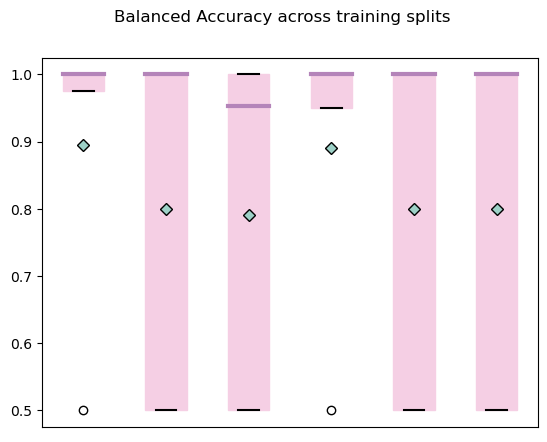

In [105]:
ordered = []

for i in range(len(bal_acc[0])):
	row = []
	for j in range(len(bal_acc)):
		row.append(bal_acc[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

boxprops = dict(linestyle='-', linewidth=1, color='#F5CFE4', facecolor= '#F5CFE4')
whiskerprops = {"color": '#B484B9', "linewidth": 2, "linestyle": '--'}
capprops={"color": 'k',  "linewidth": 1.5}
medianprops = {"color": "#B484B9", "linewidth": 3}
meanprops = dict(marker='D', markeredgecolor='black',  markerfacecolor='#9DD1C7')

fig, axs = plt.subplots(1)
fig.suptitle("Balanced Accuracy across training splits")
axs.boxplot(df,patch_artist=True,boxprops = boxprops, whiskerprops=whiskerprops, capprops=capprops,  medianprops=medianprops, meanprops=meanprops, showmeans=True)
axs.set_xticklabels(tn)
axs.set_xticks([])
plt.show()


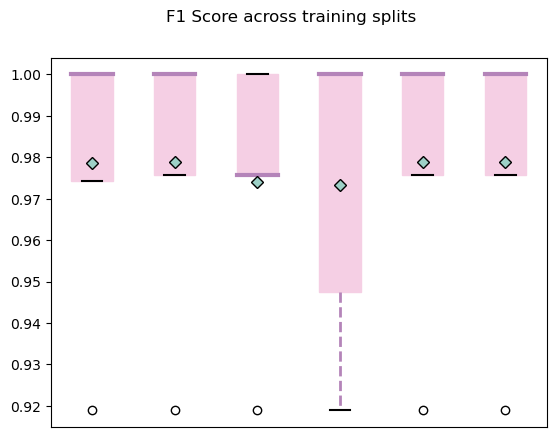

In [107]:
ordered = []

for i in range(len(f1[0])):
	row = []
	for j in range(len(f1)):
		row.append(f1[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

boxprops = dict(linestyle='-', linewidth=1, color='#F5CFE4', facecolor= '#F5CFE4')
whiskerprops = {"color": '#B484B9', "linewidth": 2, "linestyle": '--'}
capprops={"color": 'k',  "linewidth": 1.5}
medianprops = {"color": "#B484B9", "linewidth": 3}
meanprops = dict(marker='D', markeredgecolor='black',  markerfacecolor='#9DD1C7')

fig, axs = plt.subplots(1)
fig.suptitle("F1 Score across training splits")
axs.boxplot(df,patch_artist=True,boxprops = boxprops, whiskerprops=whiskerprops, capprops=capprops,  medianprops=medianprops, meanprops=meanprops, showmeans=True)
axs.set_xticklabels(tn)
axs.set_xticks([])
plt.show()


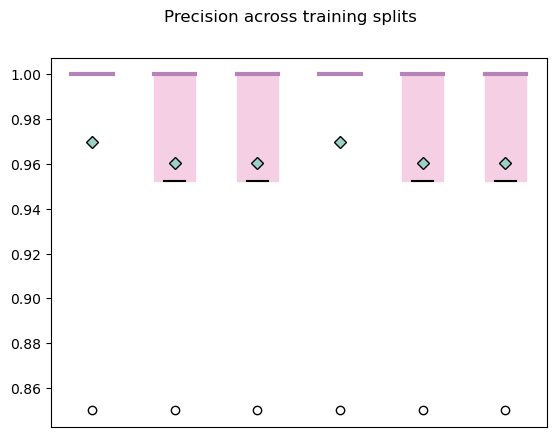

In [108]:
ordered = []

for i in range(len(prec[0])):
	row = []
	for j in range(len(prec)):
		row.append(prec[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

boxprops = dict(linestyle='-', linewidth=1, color='#F5CFE4', facecolor= '#F5CFE4')
whiskerprops = {"color": '#B484B9', "linewidth": 2, "linestyle": '--'}
capprops={"color": 'k',  "linewidth": 1.5}
medianprops = {"color": "#B484B9", "linewidth": 3}
meanprops = dict(marker='D', markeredgecolor='black',  markerfacecolor='#9DD1C7')

fig, axs = plt.subplots(1)
fig.suptitle("Precision across training splits")
axs.boxplot(df,patch_artist=True,boxprops = boxprops, whiskerprops=whiskerprops, capprops=capprops,  medianprops=medianprops, meanprops=meanprops, showmeans=True)
axs.set_xticklabels(tn)
axs.set_xticks([])
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

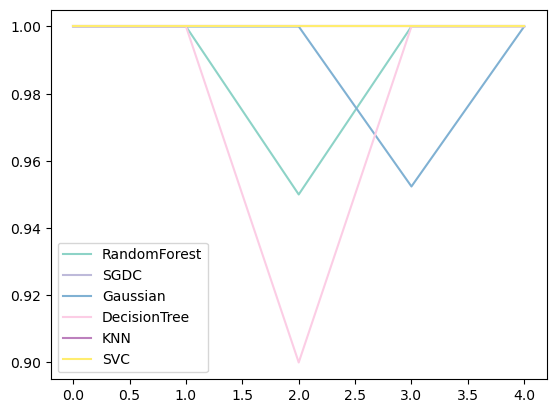

In [118]:
ordered = []

for i in range(len(recall[0])):
	row = []
	for j in range(len(recall)):
		row.append(recall[j][i])
	ordered.append(row)

columns = []
for i in range(len(tn)):
	columns.append(tn[i])

df =  pd.DataFrame(ordered, columns=columns)

df.plot(colormap='Set3')
#plt.plot(df, colormap='Tab3')
plt.show